In [1]:
import os
import sys
main_path = os.path.abspath(os.path.join('..'))
if main_path not in sys.path:
    sys.path.append(main_path)

### Data Wrangling

In [2]:
from src.data.make_dataset import *

#### Clean Data
Run the following sections of code in order to clean the data. If "clean.csv" file already exists in the data folder you can skip to the "Exploratory Data Analysis" section. 

In [3]:
# instance of class which clean the dataset
makeData = MakeDataset(project_dir = main_path)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
# original dataFrame
df = makeData.get_df()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             323750 non-null  int64  
 1   name           323746 non-null  object 
 2   category       323745 non-null  object 
 3   main_category  323750 non-null  object 
 4   currency       323750 non-null  object 
 5   deadline       323750 non-null  object 
 6   goal           323750 non-null  object 
 7   launched       323750 non-null  object 
 8   pledged        323750 non-null  object 
 9   state          323750 non-null  object 
 10  backers        323750 non-null  object 
 11  country        323750 non-null  object 
 12  usd_pledged    319960 non-null  object 
 13  Unnamed:_13    625 non-null     object 
 14  Unnamed:_14    12 non-null      object 
 15  Unnamed:_15    4 non-null       object 
 16  Unnamed:_16    1 non-null       float64
dtypes: float64(1), int64(1), obje

In [5]:
# check number of non missing values in each row
s = df.count(axis=1)
s.value_counts()

13    319336
12      3794
14       608
15         8
16         3
17         1
dtype: int64

##### Observations:
- We have 3794 rows (1.1%) with one missing value.
- 98,63% of rows have exactly 13 values

In [6]:
# clean dataset 
df = makeData.clean_dataset()
df.info()

Cleaning is Done. You can find the csvFile in data/clean.csv file
<class 'pandas.core.frame.DataFrame'>
Int64Index: 278492 entries, 0 to 323749
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               278492 non-null  int64         
 1   name             278489 non-null  object        
 2   category         278492 non-null  object        
 3   main_category    278492 non-null  object        
 4   currency         278492 non-null  object        
 5   deadline         278492 non-null  datetime64[ns]
 6   goal             278492 non-null  float64       
 7   launched         278492 non-null  datetime64[ns]
 8   pledged          278492 non-null  float64       
 9   state            278492 non-null  object        
 10  backers          278492 non-null  float64       
 11  country          274751 non-null  object        
 12  usd_pledged      278492 non-null  float64       
 13  compaign

##### Observation:
- 13,97% of rows were dropped.

### Exploratory Data Analysis

In [2]:
from src.visualizations.visualize import *
from src.data.make_dataset import *

In [3]:
# instance of class which clean the dataset
makeData = MakeDataset(project_dir = main_path)
df = makeData.get_clean_df()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


#### Data Balance

In [4]:
df.state.value_counts()

failed        166001
successful    112491
Name: state, dtype: int64

##### Observation:
- 40,39% of projects are successful.
- 59,60% of projects failed.
> The data is slightly unbalanced

In [5]:
df["percentage_achieved"] = df["pledged"]/df["goal"]

In [6]:
visualize = Visualize(df)

#### Univariate Plots

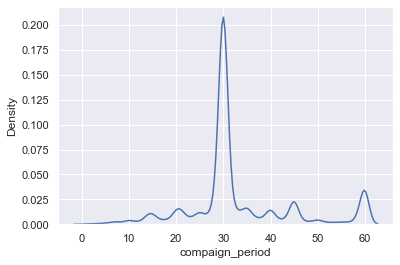

In [7]:
# compaign_period (in days)
visualize.univariate_plot("compaign_period")

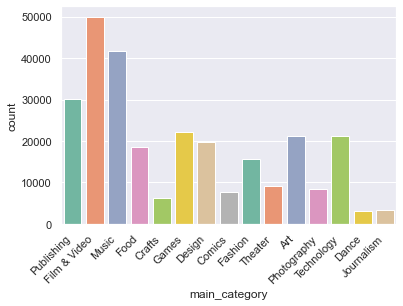

In [8]:
# main_category
visualize.univariate_plot("main_category")

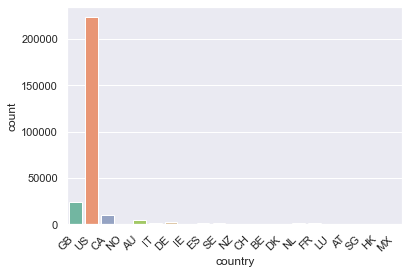

In [9]:
# country
visualize.univariate_plot("country")

#### Outliers Detection

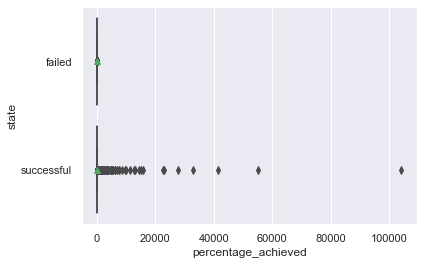

In [10]:
# percentage_achieved
visualize.box_plot("percentage_achieved")

In [13]:
# mean of percentage_achieved 
df.groupby(["state"])["percentage_achieved"].mean()

state
failed        0.089679
successful    7.952160
Name: percentage_achieved, dtype: float64

In [14]:
# std of percentage-achieved
df.groupby(["state"])["percentage_achieved"].std()

state
failed          0.150094
successful    428.551019
Name: percentage_achieved, dtype: float64

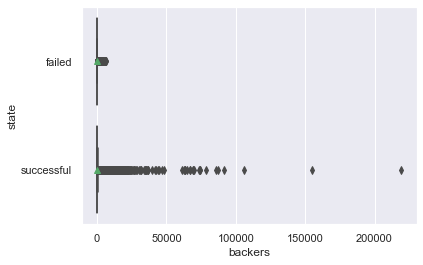

In [15]:
# backers
visualize.box_plot("backers")

In [16]:
# mean of number of backers 
df.groupby(["state"])["backers"].mean()

state
failed         16.725935
successful    252.958503
Name: backers, dtype: float64

In [17]:
# std of number of backers
df.groupby(["state"])["backers"].std()

state
failed          75.106436
successful    1563.412507
Name: backers, dtype: float64

##### Observation:
- There is more variance in both the percentage achieved (pledged/goal) and number of backers for successful projects.
> It is a sign of the presence of outliers
